In [126]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
import statsmodels.api as sm
from pandas_profiling import ProfileReport 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [127]:
training = pd.read_csv('training_data.csv', encoding = "latin")

In [128]:
training['AVERAGE_CLOUDINESS'] = training['AVERAGE_CLOUDINESS'].fillna(training['AVERAGE_CLOUDINESS'].mode()[0])
training['AVERAGE_RAIN'] = training['AVERAGE_RAIN'].fillna('NoData')

In [129]:
training['AVERAGE_SPEED_DIFF'] = training['AVERAGE_SPEED_DIFF'].astype('category')
training['AVERAGE_RAIN'] = training['AVERAGE_CLOUDINESS'].astype('category')

In [130]:
training['record_date'] = pd.to_datetime(training['record_date'])

training['weekday'] = training['record_date'].dt.dayofweek
training['hour'] = training['record_date'].dt.hour
training['month'] = training['record_date'].dt.month
training['year'] = training['record_date'].dt.year
training['day'] = training['record_date'].dt.day
training.drop(['record_date'],axis=1)

,city_name,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,weekday,hour,month,year,day
0,Porto,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,céu claro,0.0,céu claro,3,7,8,2019,29
1,Porto,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,céu claro,4,14,8,2018,10
2,Porto,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,céu claro,0.0,céu claro,6,16,9,2019,1
3,Porto,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,céu claro,1,11,2,2019,26
4,Porto,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,céu claro,0.0,céu claro,3,12,6,2019,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,Porto,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro,0.0,céu claro,5,9,2,2019,23
6808,Porto,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,céu claro,0.0,céu claro,5,18,6,2019,8
6809,Porto,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro,0.0,céu claro,1,4,10,2018,2
6810,Porto,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens,0.0,algumas nuvens,2,1,1,2019,30


In [131]:
def applyer(row):
    if row == 5 or row == 6:
        return 1
    else:
        return 0 
temp2 = training['weekday'].apply(applyer) 
training['weekend']=temp2

In [132]:
training['AVERAGE_DISTANCE_FREE'] = training['AVERAGE_FREE_FLOW_TIME'] * training['AVERAGE_FREE_FLOW_SPEED']
training['AVERAGE_TIME'] = training['AVERAGE_TIME_DIFF'] + training['AVERAGE_FREE_FLOW_TIME'] 
training['AVERAGE_SPEED'] =  training['AVERAGE_DISTANCE_FREE'] / training['AVERAGE_TIME']
training['AVERAGE_SPEED_DIFF_Num'] =  training['AVERAGE_FREE_FLOW_SPEED'] - training['AVERAGE_SPEED']

In [133]:
#training = training.drop(['city_name','record_date','AVERAGE_PRECIPITATION','AVERAGE_FREE_FLOW_SPEED','AVERAGE_DISTANCE_FREE','year','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','month','AVERAGE_RAIN'],axis=1)
training = training.drop(['city_name','record_date','AVERAGE_PRECIPITATION','AVERAGE_FREE_FLOW_SPEED','AVERAGE_DISTANCE_FREE','AVERAGE_FREE_FLOW_TIME','AVERAGE_RAIN'],axis=1)

In [134]:
profile = ProfileReport(training)

In [135]:
#profile.to_notebook_iframe()

In [136]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler 

In [137]:

df_dummies = training[['AVERAGE_CLOUDINESS','LUMINOSITY']]

In [138]:
dummied = training.copy()

In [139]:
for i in df_dummies:
    dummied = pd.concat([dummied,pd.get_dummies(dummied[i])],axis='columns').drop([i],axis='columns')

In [140]:
dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_SPEED_DIFF       6812 non-null   category
 1   AVERAGE_TIME_DIFF        6812 non-null   float64 
 2   AVERAGE_TEMPERATURE      6812 non-null   float64 
 3   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 4   AVERAGE_HUMIDITY         6812 non-null   float64 
 5   AVERAGE_WIND_SPEED       6812 non-null   float64 
 6   weekday                  6812 non-null   int64   
 7   hour                     6812 non-null   int64   
 8   month                    6812 non-null   int64   
 9   year                     6812 non-null   int64   
 10  day                      6812 non-null   int64   
 11  weekend                  6812 non-null   int64   
 12  AVERAGE_TIME             6812 non-null   float64 
 13  AVERAGE_SPEED            6812 non-null   float64 
 14  AVERAGE_

In [141]:
finalTrain = dummied.reindex(sorted(dummied.columns), axis=1)

In [142]:

X = finalTrain.drop(['AVERAGE_SPEED_DIFF'],axis=1)
y = finalTrain['AVERAGE_SPEED_DIFF']

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2022)

In [144]:
#sm = BorderlineSMOTE(random_state=2021,kind='borderline-2')
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [145]:
#sme = SMOTEENN(random_state=2021,sampling_strategy='not majority')
#X_res, y_res = sme.fit_resample(X_train, y_train)

In [146]:
scaler = RobustScaler()

In [147]:
#X_res = X_train
#y_res = y_train

In [148]:
#X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_WIND_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.fit_transform(X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_WIND_SPEED','AVERAGE_SPEED_DIFF_Num']])
#X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_WIND_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_WIND_SPEED','AVERAGE_SPEED_DIFF_Num']])

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier


In [150]:
classifiers = [LogisticRegression(solver='liblinear'),
    RandomForestClassifier(random_state=2021,n_jobs=-1),
    KNeighborsClassifier(n_jobs=-1),
    DecisionTreeClassifier(random_state=2021),
    LogisticRegression(random_state=2021,max_iter = 20000,n_jobs=-1),
    MLPClassifier(random_state=2021),
    AdaBoostClassifier(random_state=2021),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SVC(random_state=2021),
    GaussianProcessClassifier(random_state=2021),
    XGBClassifier(random_state=2021,n_jobs=-1)]

In [151]:
'''
for i in classifiers:
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('______________________________________________')
    print(i)
    print('..............................................')
    print('Train',model.score(X_train, y_train)*100)
    print('Test',model.score(X_test, y_test)*100)
'''

"\nfor i in classifiers:\n    model = i\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    print('______________________________________________')\n    print(i)\n    print('..............................................')\n    print('Train',model.score(X_train, y_train)*100)\n    print('Test',model.score(X_test, y_test)*100)\n"

In [152]:
from pycaret.classification import *

In [153]:
finalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 1   AVERAGE_HUMIDITY         6812 non-null   float64 
 2   AVERAGE_SPEED            6812 non-null   float64 
 3   AVERAGE_SPEED_DIFF       6812 non-null   category
 4   AVERAGE_SPEED_DIFF_Num   6812 non-null   float64 
 5   AVERAGE_TEMPERATURE      6812 non-null   float64 
 6   AVERAGE_TIME             6812 non-null   float64 
 7   AVERAGE_TIME_DIFF        6812 non-null   float64 
 8   AVERAGE_WIND_SPEED       6812 non-null   float64 
 9   DARK                     6812 non-null   uint8   
 10  LIGHT                    6812 non-null   uint8   
 11  LOW_LIGHT                6812 non-null   uint8   
 12  algumas nuvens           6812 non-null   uint8   
 13  céu claro                6812 non-null   uint8   
 14  céu limp

In [154]:
cat_features =['weekday','hour','day','year','month','weekend']

In [155]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)


In [166]:
classify = setup(data = finalTrain , target = 'AVERAGE_SPEED_DIFF',train_size=0.7,session_id=2021,normalize = True,fix_imbalance=True,fix_imbalance_method=ros)

,Description,Value
0,session_id,2021
1,Target,AVERAGE_SPEED_DIFF
2,Target Type,Multiclass
3,Label Encoded,"High: 0, Low: 1, Medium: 2, None: 3, Very_High: 4"
4,Original Data,"(6812, 27)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='AVERAGE_SPEED_DIFF',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dumm

In [167]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8071,0.9640,0.8016,0.8095,0.8075,0.7477,0.7481,0.3540
xgboost,Extreme Gradient Boosting,0.8016,0.9631,0.7961,0.8036,0.8019,0.7405,0.7409,0.9570
rf,Random Forest Classifier,0.7959,0.9618,0.7901,0.7998,0.7966,0.7331,0.7338,0.1030
gbc,Gradient Boosting Classifier,0.7909,0.9614,0.7935,0.7980,0.7922,0.7275,0.7287,0.8140
lr,Logistic Regression,0.7792,0.9533,0.7819,0.7817,0.7790,0.7114,0.7121,0.1190
et,Extra Trees Classifier,0.7724,0.9538,0.7577,0.7705,0.7699,0.7006,0.7014,0.1070
lda,Linear Discriminant Analysis,0.7393,0.9277,0.7487,0.7390,0.7379,0.6588,0.6594,0.0130
dt,Decision Tree Classifier,0.7307,0.8262,0.7147,0.7319,0.7304,0.6473,0.6477,0.0210
ada,Ada Boost Classifier,0.7129,0.8435,0.7014,0.7172,0.6935,0.6221,0.6318,0.0630
svm,SVM - Linear Kernel,0.6839,0.0000,0.6882,0.6892,0.6757,0.5870,0.5908,0.0320


create_model_container: 15
master_model_container: 15
display_container: 2
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
compare_models() succesfully completed......................................


In [168]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8008,0.9616,0.7863,0.8091,0.8029,0.7394,0.7402
1,0.7799,0.9633,0.7723,0.7782,0.7785,0.7113,0.7116
2,0.8092,0.9641,0.8083,0.8104,0.8096,0.7505,0.7505
3,0.8071,0.9603,0.7972,0.8104,0.8079,0.7479,0.7483
4,0.7966,0.9624,0.7890,0.8011,0.7980,0.7342,0.7347
5,0.8218,0.9662,0.8121,0.8243,0.8226,0.7670,0.7673
6,0.8092,0.9662,0.8022,0.8098,0.8092,0.7507,0.7508
7,0.8071,0.9641,0.7934,0.8069,0.8070,0.7477,0.7477
8,0.8193,0.9677,0.8274,0.8255,0.8207,0.7649,0.7658
9,0.8193,0.9643,0.8281,0.8189,0.8183,0.7635,0.7639


create_model_container: 16
master_model_container: 16
display_container: 3


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
create_model() succesfully completed......................................


In [63]:
bagged_lightgbm = ensemble_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7987,0.9609,0.7858,0.8038,0.8006,0.7368,0.7371
1,0.7966,0.9650,0.7998,0.7964,0.7958,0.7339,0.7341
2,0.8071,0.9674,0.8046,0.8086,0.8072,0.7478,0.7480
3,0.8008,0.9613,0.7995,0.8055,0.8024,0.7399,0.7404
4,0.8260,0.9638,0.8175,0.8314,0.8271,0.7726,0.7734
5,0.8218,0.9693,0.8192,0.8251,0.8230,0.7672,0.7675
6,0.8155,0.9648,0.8254,0.8177,0.8154,0.7597,0.7602
7,0.7904,0.9659,0.7821,0.7929,0.7912,0.7265,0.7267
8,0.8235,0.9688,0.8295,0.8280,0.8248,0.7702,0.7708
9,0.8172,0.9657,0.8188,0.8166,0.8165,0.7602,0.7604


create_model_container: 17
master_model_container: 17
display_container: 4
BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                importance_type='split',
                                                learning_rate=0.1, max_depth=-1,
                                                min_child_samples=20,
                                                min_child_weight=0.001,
                                                min_split_gain=0.0,
                                                n_estimators=100, n_jobs=-1,
                                                num_leaves=31, objective=None,
                                                random_state=2021,
                                                reg_alpha=0.0, reg_lambda=0.0,
                                                sile

In [469]:
boosted_lightgbm = ensemble_model(lightgbm, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8023,0.9598,0.8025,0.8192,0.8064,0.7428,0.7455
1,0.7691,0.9510,0.7606,0.7806,0.7726,0.6976,0.6986
2,0.7750,0.9582,0.7522,0.7784,0.7761,0.7061,0.7064
3,0.7847,0.9542,0.7745,0.7937,0.7874,0.7185,0.7195
4,0.7828,0.9607,0.7774,0.7950,0.7860,0.7171,0.7190
5,0.7710,0.9540,0.7737,0.7873,0.7752,0.7018,0.7043
6,0.7769,0.9548,0.7714,0.7963,0.7808,0.7091,0.7123
7,0.7750,0.9551,0.7620,0.7867,0.7774,0.7066,0.7085
8,0.7808,0.9586,0.7537,0.7942,0.7830,0.7141,0.7166
9,0.7941,0.9592,0.8011,0.8002,0.7964,0.7313,0.7318


create_model_container: 21
master_model_container: 21
display_container: 8
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                 class_weight=None,
                                                 colsample_bytree=1.0,
                                                 importance_type='split',
                                                 learning_rate=0.1,
                                                 max_depth=-1,
                                                 min_child_samples=20,
                                                 min_child_weight=0.001,
                                                 min_split_gain=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 num_leaves=31, objective=None,
                                                 random_state=2021,
                               

In [159]:
tuned_ada = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7799,0.9591,0.7705,0.7868,0.7815,0.7122,0.7133
1,0.7862,0.9623,0.7903,0.7856,0.7850,0.7200,0.7204
2,0.8050,0.9666,0.8095,0.8090,0.8058,0.7456,0.7460
3,0.8071,0.9606,0.8140,0.8180,0.8089,0.7487,0.7507
4,0.8176,0.9619,0.8190,0.8250,0.8192,0.7623,0.7635
5,0.7820,0.9640,0.7743,0.7879,0.7839,0.7155,0.7161
6,0.7925,0.9619,0.8052,0.7999,0.7934,0.7303,0.7315
7,0.7925,0.9632,0.7840,0.7946,0.7932,0.7293,0.7294
8,0.7920,0.9628,0.7979,0.7970,0.7932,0.7291,0.7298
9,0.8025,0.9632,0.8125,0.8080,0.8029,0.7419,0.7431


create_model_container: 17
master_model_container: 17
display_container: 4
LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=120, n_jobs=-1, num_leaves=150, objective=None,
               random_state=2021, reg_alpha=1e-06, reg_lambda=10, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
tune_model() succesfully completed......................................


In [65]:
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [169]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7862,0.9533,0.7799,0.7888,0.7870,0.7198,0.7200
1,0.7778,0.9600,0.7719,0.7751,0.7760,0.7083,0.7086
2,0.8197,0.9609,0.8062,0.8189,0.8190,0.7638,0.7639
3,0.7966,0.9556,0.7934,0.7965,0.7963,0.7338,0.7339
4,0.8155,0.9571,0.8016,0.8167,0.8157,0.7583,0.7584
5,0.8176,0.9652,0.8110,0.8228,0.8193,0.7617,0.7623
6,0.8218,0.9639,0.8115,0.8223,0.8215,0.7670,0.7673
7,0.7862,0.9585,0.7743,0.7868,0.7864,0.7203,0.7203
8,0.8298,0.9645,0.8288,0.8333,0.8310,0.7781,0.7784
9,0.8151,0.9609,0.8210,0.8161,0.8146,0.7579,0.7585


create_model_container: 17
master_model_container: 17
display_container: 4
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=110,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=140, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
tune_model() succesfully completed......................................


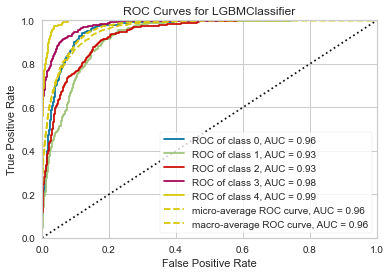

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [161]:
plot_model(lightgbm)

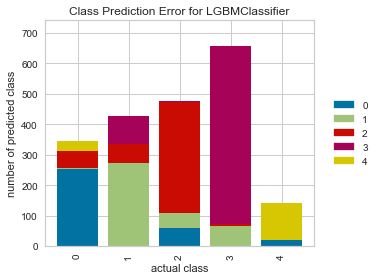

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [170]:
plot_model(tuned_lightgbm, plot = 'error')

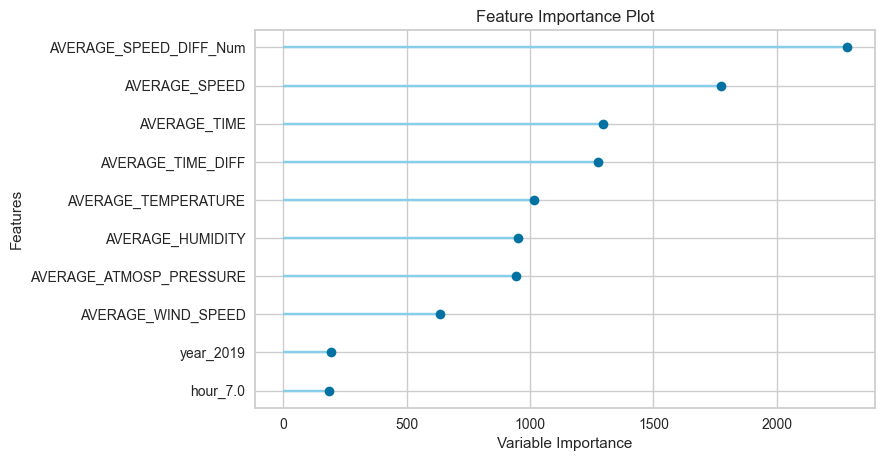

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [163]:
plot_model(lightgbm, plot='feature')

In [171]:
evaluate_model(tuned_lightgbm)

Initializing evaluate_model()
evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=110,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=140, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [173]:
predict_model(tuned_lightgbm);

Initializing predict_model()
predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=110,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=140, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7798,0.9563,0.7706,0.7838,0.7814,0.7124,0.7126


In [174]:
final_lightgbm = finalize_model(tuned_lightgbm)

Initializing finalize_model()
finalize_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=110,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=140, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None)
Finalizing LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=110,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=140, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsa

In [175]:
testing = pd.read_csv('workedTesting.csv')

In [176]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 1   AVERAGE_CLOUDINESS       1500 non-null   object 
 2   AVERAGE_HUMIDITY         1500 non-null   float64
 3   AVERAGE_SPEED            1500 non-null   float64
 4   AVERAGE_SPEED_DIFF_Num   1500 non-null   float64
 5   AVERAGE_TEMPERATURE      1500 non-null   float64
 6   AVERAGE_TIME             1500 non-null   float64
 7   AVERAGE_TIME_DIFF        1500 non-null   float64
 8   AVERAGE_WIND_SPEED       1500 non-null   float64
 9   DARK                     1500 non-null   int64  
 10  LIGHT                    1500 non-null   int64  
 11  LOW_LIGHT                1500 non-null   int64  
 12  LUMINOSITY               1500 non-null   object 
 13  algumas nuvens           1500 non-null   int64  
 14  céu claro               

In [179]:
unseen_predictions = predict_model(final_lightgbm, data=testing)
unseen_predictions.head().sort_values(by='Score',ascending=True)

Initializing predict_model()
predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=110,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=140, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
Checking exceptions
Preloading libraries
Preparing display monitor


,AVERAGE_ATMOSP_PRESSURE,AVERAGE_CLOUDINESS,AVERAGE_HUMIDITY,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,AVERAGE_TEMPERATURE,AVERAGE_TIME,AVERAGE_TIME_DIFF,AVERAGE_WIND_SPEED,DARK,...,nublado,nuvens dispersas,nuvens quebradas,nuvens quebrados,tempo nublado,weekday,weekend,year,Label,Score
3,1016.0,céu pouco nublado,77.0,21.078249,12.121751,22.0,141.6,51.7,4.0,0,...,0,0,0,0,0,5,1,2019,High,0.9670
1,1020.0,nuvens dispersas,93.0,36.674157,5.825843,11.0,89.0,12.2,4.0,1,...,0,1,0,0,0,2,0,2018,Medium,0.9968
0,1026.0,céu claro,71.0,39.200000,0.000000,8.0,91.0,0.0,1.0,1,...,0,0,0,0,0,2,0,2019,None,1.0000
2,1017.0,céu claro,93.0,45.900000,0.000000,14.0,86.3,0.0,0.0,1,...,0,0,0,0,0,1,0,2018,None,1.0000
4,1004.0,céu claro,100.0,42.269663,1.730337,12.0,89.0,3.5,9.0,1,...,0,0,0,0,0,0,0,2018,Low,1.0000


In [180]:
unseen_predictions['AVERAGE_SPEED_DIFF'] = unseen_predictions['Label']

In [181]:
unseen_predictions

,AVERAGE_ATMOSP_PRESSURE,AVERAGE_CLOUDINESS,AVERAGE_HUMIDITY,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,AVERAGE_TEMPERATURE,AVERAGE_TIME,AVERAGE_TIME_DIFF,AVERAGE_WIND_SPEED,DARK,...,nuvens dispersas,nuvens quebradas,nuvens quebrados,tempo nublado,weekday,weekend,year,Label,Score,AVERAGE_SPEED_DIFF
0,1026.0,céu claro,71.0,39.200000,0.000000,8.0,91.0,0.0,1.0,1,...,0,0,0,0,2,0,2019,None,1.0000,None
1,1020.0,nuvens dispersas,93.0,36.674157,5.825843,11.0,89.0,12.2,4.0,1,...,1,0,0,0,2,0,2018,Medium,0.9968,Medium
2,1017.0,céu claro,93.0,45.900000,0.000000,14.0,86.3,0.0,0.0,1,...,0,0,0,0,1,0,2018,None,1.0000,None
3,1016.0,céu pouco nublado,77.0,21.078249,12.121751,22.0,141.6,51.7,4.0,0,...,0,0,0,0,5,1,2019,High,0.9670,High
4,1004.0,céu claro,100.0,42.269663,1.730337,12.0,89.0,3.5,9.0,1,...,0,0,0,0,0,0,2018,Low,1.0000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1013.0,céu claro,100.0,49.523284,0.676716,11.0,81.6,1.1,5.0,1,...,0,0,0,0,5,1,2018,Low,1.0000,Low
1496,1028.0,céu claro,100.0,36.062084,1.937916,9.0,90.2,4.6,0.0,1,...,0,0,0,0,4,0,2019,None,0.9990,None
1497,1013.0,céu claro,100.0,43.800000,0.000000,16.0,80.4,0.0,1.0,1,...,0,0,0,0,2,0,2018,None,1.0000,None
1498,1004.0,céu claro,87.0,23.000000,23.000000,10.0,166.4,83.2,5.0,0,...,0,0,0,0,0,0,2018,Very_High,1.0000,Very_High


In [182]:
sub_df = pd.read_csv('example_submission.csv')
final_data = {'RowId': sub_df.RowId, 'Speed_Diff': unseen_predictions['AVERAGE_SPEED_DIFF']}
submission = pd.DataFrame(data=final_data)

In [183]:
submission['Speed_Diff'].value_counts()

None         483
Medium       341
Low          310
High         264
Very_High    102
Name: Speed_Diff, dtype: int64

In [184]:
compare = pd.read_csv('sample_submission.csv')

In [185]:
compare['Speed_Diff'].value_counts()

None         482
Medium       340
Low          313
High         268
Very_High     97
Name: Speed_Diff, dtype: int64

In [186]:
df1 = np.where(submission['Speed_Diff'] == compare['Speed_Diff'], 'True', 'False')
df1 = pd.DataFrame(df1)
df1.columns=['equals']
df1.value_counts()

equals
True      1354
False      146
dtype: int64

In [187]:
submission.head()

,RowId,Speed_Diff
0,1,None
1,2,Medium
2,3,None
3,4,High
4,5,Low


In [188]:
submission.to_csv('submission.csv',index=False)